In [2]:
import numpy as np
import math
from sympy import Symbol, Rational, binomial, expand_func
from scipy.stats import binom
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
np.random.seed(1)

In [ ]:
#############################################################################################
#This short python programme was recently written to solve an interesting problem raised by a friend:
#Consider a network with N nodes. Edges between each pair of nodes are generated randomly with given probability P.
#How "connected" is such a graph? In particular, what is the average shortest path between any two nodes? What is the number of edges?
############################################################################################

In [3]:
#Generates a network with N nodes, P being the probability of each edge existing,
#returns the coeffienct matrix where coeff[i][j]==1 means there's an edge connecting node i and j,
#otherwise 0.
#This should be a symmetric matrix with 0 diagonals.
################################################
def genNetwork(N, P=0.08):
    coeff = np.random.rand(N,N)
    coeff = np.triu(coeff) + np.triu(coeff).T
            # this step is to ensure coeff is a RAMDOM symmetric matrix; 
            #(coeff+coeff.T)/2 doesn't work: elements of the resulting matrix is much more likely to be close to 1/2.
    coeff = (coeff < P) * 1
    coeff = np.minimum(coeff,np.ones((N,N))-np.identity(N))
            #subtracting diagonal
    return coeff

In [4]:
myMatrix = genNetwork(250,0.08)

In [5]:
#Compute average shortest path.
#The algorithm is to calculate i-connectedness in turn, 
#where 0-connectedness is the "direct connectedness", 1-connectedness is "connected via one middle node", etc.
#I used a 3d array 'connect' to store this information, i.e. connect[i] = i-connectedness.
#In practice, two 2d arrays would be enough (only connect[i-1] and connect[i] need to be kept track of).
#But it's nice to store everything when possible, for testing convenience.
######################################

def averageShortestPath(N,R):
    maxD = float("inf")
    connect = np.zeros((N,N,N))
    connect[0] = R
    dist = np.sum(R)
    i = 1
    while i < N-1:
        connect[i] = np.dot(R,connect[i-1]) + connect[i-1] > 0
        connect[i] = connect[i] * (np.ones((N,N)) - np.identity(N))
        if np.sum(connect[i]-connect[i-1])==0:
            break
        dist = dist + np.sum(connect[i]-connect[i-1]) * (i+1)
        i+=1
    print(str(connect[i]))
    connectedPairs = np.sum(connect[i])
    average = dist/connectedPairs    
    return average

################################
#I understood average shortest path as the average of shortest (existing) paths between CONNECTED pairs of nodes, 
#so infinity is not considered a valid value.
#If "shortest path" meant "distance", I would add a line after the while loop to decide if the graph is connected:
#that is, if connect[i]!= np.ones((N,N))-np.identity(N), the function should return infinity.
#That's because if the graph is disconnected, some distance must be infinity so the average will always be infinity.
#It's quite safe to assume the graph to be connected in this case as the loop normally ends after 20 iterations.

In [6]:
averageShortestPath(250,myMatrix)

[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


2.101590361445783

In [7]:
#Gets the number of edges for a given network
def edgeNumber(coeff):
    return np.sum(coeff)/2

In [8]:
edgeNumber(myMatrix)
################
#The number of edges of the whole network is a binomial distribution with mean mu=(N*(N-1)/2) * p and is 2490 in this case.

2501.0

In [9]:
#plot the above binomial distribution using the cdf method of binom class in scipy. 
    #N: number of nodes
    #p: probability
    #l: length of interval
    #rang: plotting range
##################
def plot(N,p,l=10, rang = 1000):
    n = int(N * (N-1)/2)
    mu = n*p
    mid = mu/l
    step = int(rang/l)
    prob = np.zeros(step)
    dens = np.zeros(step)
    for i in range(0,step):
        prob[i] = binom.cdf((i+mid-step/2)*l,n,p)
        dens[i] = prob[i]-prob[i-1]
    #mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
    #plt.show()
    plt.plot(np.arange(mu-rang/2,mu+rang/2,l),dens)
    plt.show()
    return dens

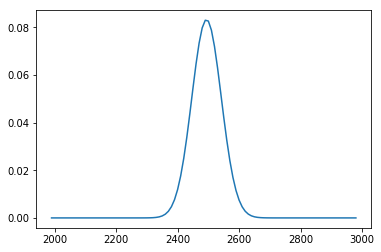

In [10]:
density = plot(250,0.08)